In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os 
import bm3d
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio
from layeris.layer_image import LayerImage
%matplotlib inline

In [2]:
root_path_testing = 'before/*.jpg' ## di path mana gambar akan di blend
root_path_saving = 'after/'  ## dimana gambar akan disave
file_path = glob.glob(root_path_testing)

In [3]:
for path in file_path:
    img=cv2.imread(path)
    th, img_th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,img_th1)


Hasil Fixed Thresholding
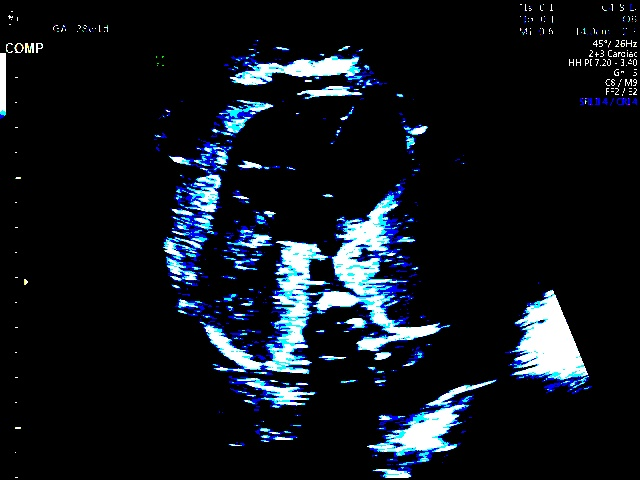

In [4]:
for path in file_path:
    img_th2=cv2.imread(path)
    kernel = np.ones((3,3),np.float32)/9
    filt_2D = cv2.filter2D(img, - 1,kernel)

    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,img_th2)


Hasil Denoising Filter 2D
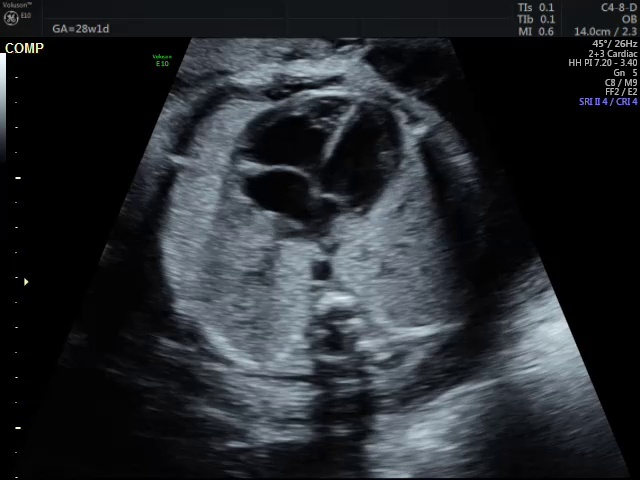

In [5]:
for path in file_path:
    img=cv2.imread(path)
    kernel = np.ones((3,3),np.float32)/9
    blur = cv2.blur(img,(3,3))
    # split filename
    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,blur)

Hasil Denoising Blur
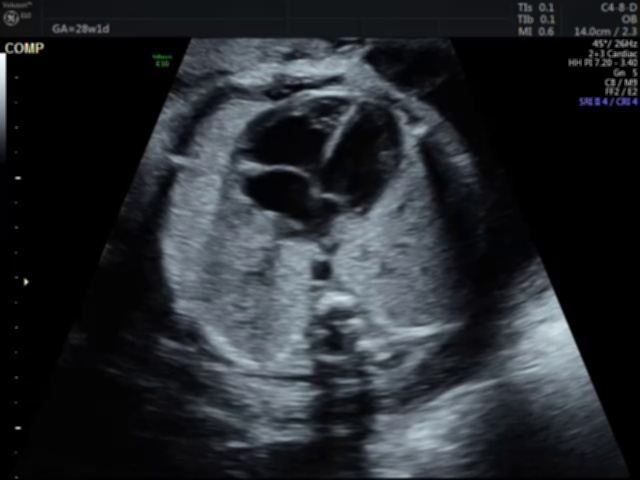

In [6]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
for path in file_path:
    image = cv2.imread(path, 0)
    image_equ = clahe.apply(image)
    
    # split filename
    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename, image_equ)


Hasil CLAHE
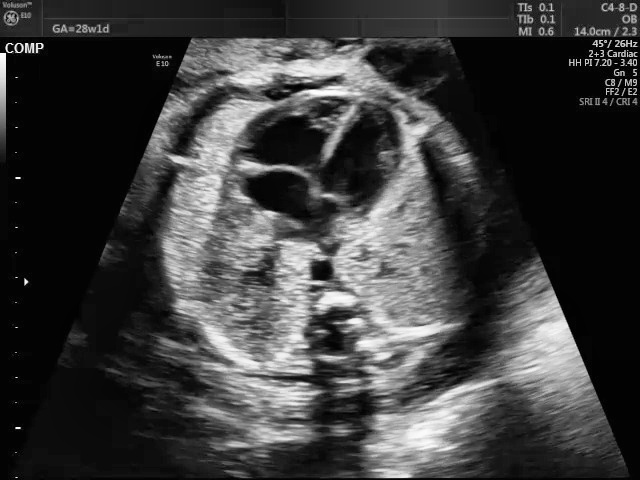

In [7]:
for path in file_path:
    img = cv2.imread(path,0) ## grayscale 
    equ = cv2.equalizeHist(img)
    
    ##save
    filename = path.split("\\")[-1]
    cv2.imwrite(root_path_saving + filename ,equ)

Hasil Histogram Equalization
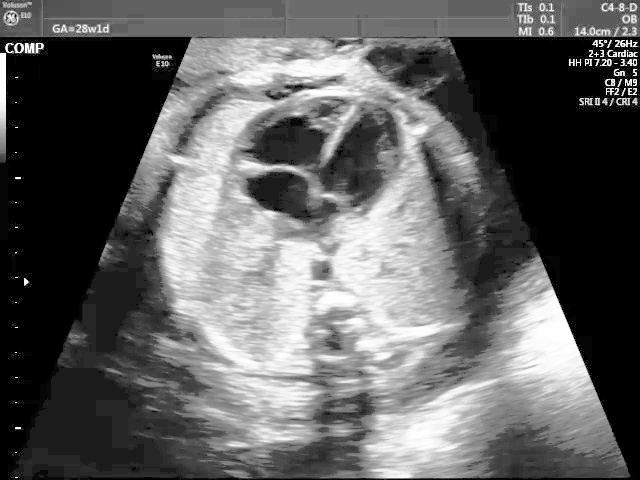

In [8]:
for path in file_path:
    img = img_as_float(io.imread(path,as_gray= True))
    BM3D_denoised_image = bm3d.bm3d(img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)
    #BM3D_denoised_image = bm3d.bm3d(img, sigma_psd=.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

    filename = path.split('\\')[-1]
    plt.imsave(root_path_saving + filename,BM3D_denoised_image,cmap='gray')

Hasil BM3D
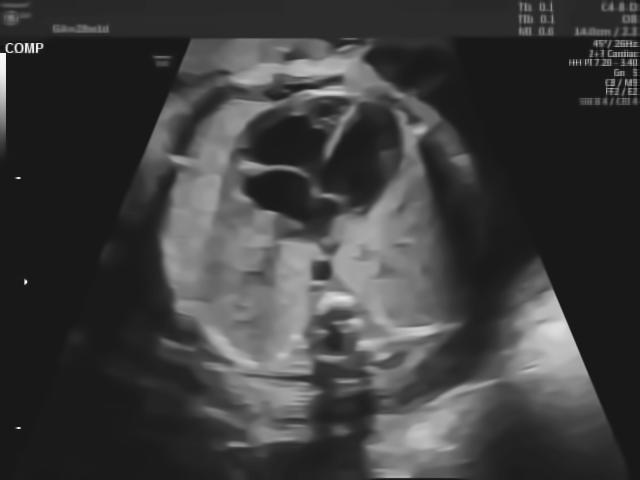

In [11]:
import cv2
import numpy as np
img = cv2.imread("before/Case1.jpg")
img = cv2.resize(img, (300,300), cv2.INTER_CUBIC)
cv2.imshow("img", img)


#UNTUK MEMBUAT GAMBAR MENJADI ABU-ABU (GRAYSCALING)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", img_gray)

#KITA MENCARI SENDIRI NILAI THRESHOLD NYA
#Fix Thresholding global
th, img_th1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

#OTSU MENCARI NILAI THRESHOLDING YANG PALING OPTIMAL
th, img_th2 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

cv2.imshow("img fix th", img_th1)
cv2.imshow("img otsu th", img_th2)

#edge detection
img_edge = cv2.Canny(img, 135,200)
cv2.imshow("edge detection", img_edge)

#segmentation (Mengambil yang mana foreground yang mana background)
ret, result = cv2.connectedComponents(img_th2)
idx = 0
background = np.zeros(img_th2.shape, np.uint8)
for res in np.unique(result):
    if res == 0:
        continue
    temp_obj = np.zeros(img_th2.shape, np.uint8)
    temp_obj[result ==res] = 255
   
    background = cv2.add(background, temp_obj)
    
conturs, hierarchy = cv2.findContours(background, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for idx_contur in conturs:
    for path in file_path:
        x, y, w, h, = cv2.boundingRect(idx_contur)
        start = (x, y)
        end = (x + w, y + h)
        imgg = cv2.rectangle(img_th2, start, end, (255,0,0), 2)
    filename = path.split("\\")[-1]
    cv2.imwrite(root_path_saving + filename ,imgg)
cv2.imshow("segmentation", img)

Hasil Segmentasi
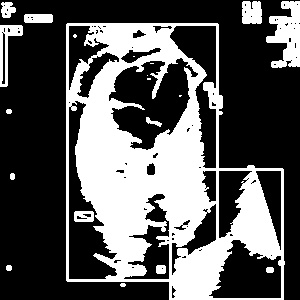

In [12]:
from sklearn.model_selection import train_test_split
import glob
import numpy as np
import os
import shutil

data_type = "sebelum split"
idx = 0



root_folder_image = "image/*.jpg".format(data_type, idx)
root_folder_label = "label/*.jpg".format(data_type,idx)

image = glob.glob(root_folder_image)
label = glob.glob(root_folder_label)

image = np.array(image)
label = np.array(label)

index_image = np.arange(len(image))
index_label = np.arange(len(label))

idx_image_train , idx_image_test, _ , _ = train_test_split(index_image, index_image, test_size  = 0.2, random_state = 32)

image_train = image[idx_image_train]
image_test = image[idx_image_test]




filenames =glob.glob("label/*.jpg")

## root path yang digunakan
root_path_saving_train_image = 'train split/image'  ## dimana gambar akan disave
root_path_saving_test_image = 'test split/image'  ## dimana gambar akan disave
root_path_saving_train_label = 'train split/label'  ## dimana gambar akan disave
root_path_saving_test_label = 'test split/label'  ## dimana gambar akan disave

#make new directory
os.makedirs(root_path_saving_train_image, exist_ok = True)
os.makedirs(root_path_saving_test_image, exist_ok = True)
os.makedirs(root_path_saving_train_label, exist_ok = True)
os.makedirs(root_path_saving_test_label, exist_ok = True)


## split data train image

for idx, path in enumerate(image_train):
    filename = path.split('\\')[-1]
    shutil.copy2(path,root_path_saving_train_image.format(filename))

 
path_test = "label/"
for i in range (len(image)):
    for j in range(len(image_train)):
        if(image[i]==image_train[j]):
            filename_train = image[i].split('\\')[-1]
            shutil.copy2(path_test+filename_train,root_path_saving_train_label.format(filename_train))
  
    
for idx, path in enumerate(image_test):
    filename = path.split('\\')[-1]
    shutil.copy2(path,root_path_saving_test_image.format(filename))
    
    
path_test = "label/"
for i in range (len(image)):
    for j in range(len(image_test)):
        if(image[i]==image_test[j]):
            filename_train = image[i].split('\\')[-1]
            shutil.copy2(path_test+filename_train,root_path_saving_test_label.format(filename_train))
      
